In [1]:
# !pip install xraydb

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from xraydb import mu_elam, atomic_symbol, material_mu, material_mu_components

In [4]:
mu_elam('Fe', 1e3)

9085.264899818074

In [5]:
material_mu('Fe', 1e3)

71591.88741056641

In [6]:
material_mu('H2O', 1e3)

4077.1043506612236

In [8]:
a = np.arange(100, 1e5, 100)
water = material_mu('H2O', a)
air = material_mu('air', a)
c = material_mu('C', a)

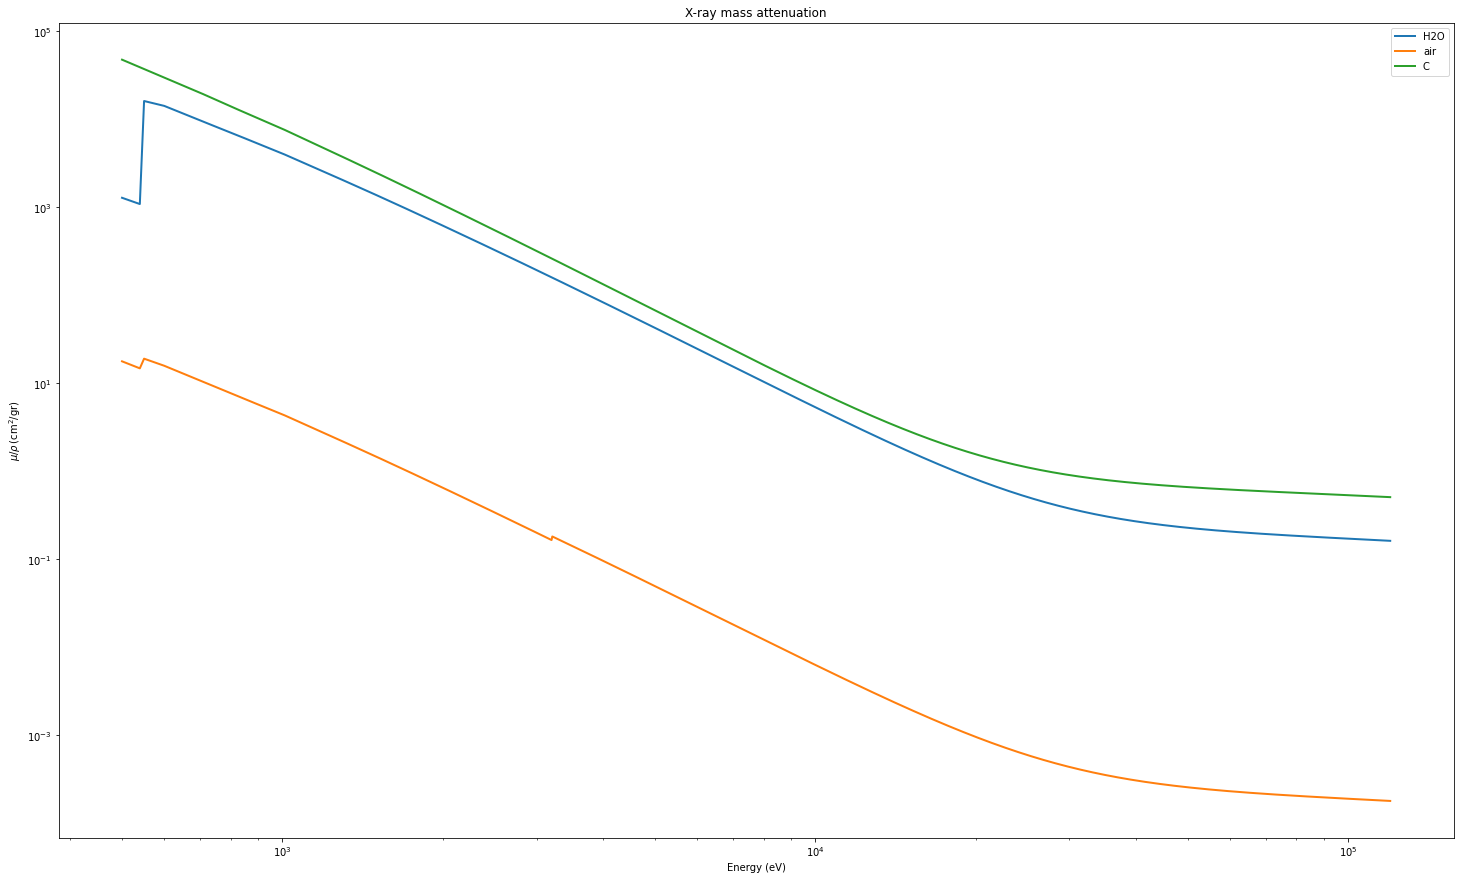

In [12]:
energy = np.arange(500, 120000, 10) # in eV
fig = plt.figure(figsize=(25, 15))
for elem in ('H2O', 'air', 'C'):
    mu = material_mu(elem, energy)
    plt.plot(energy, mu, label = elem, linewidth=2)

plt.title("X-ray mass attenuation")
plt.xlabel('Energy (eV)')
plt.ylabel(r'$\mu/\rho \rm\, (cm^2/gr)$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.savefig('energy_dist.png', dpi = 300)
plt.show()

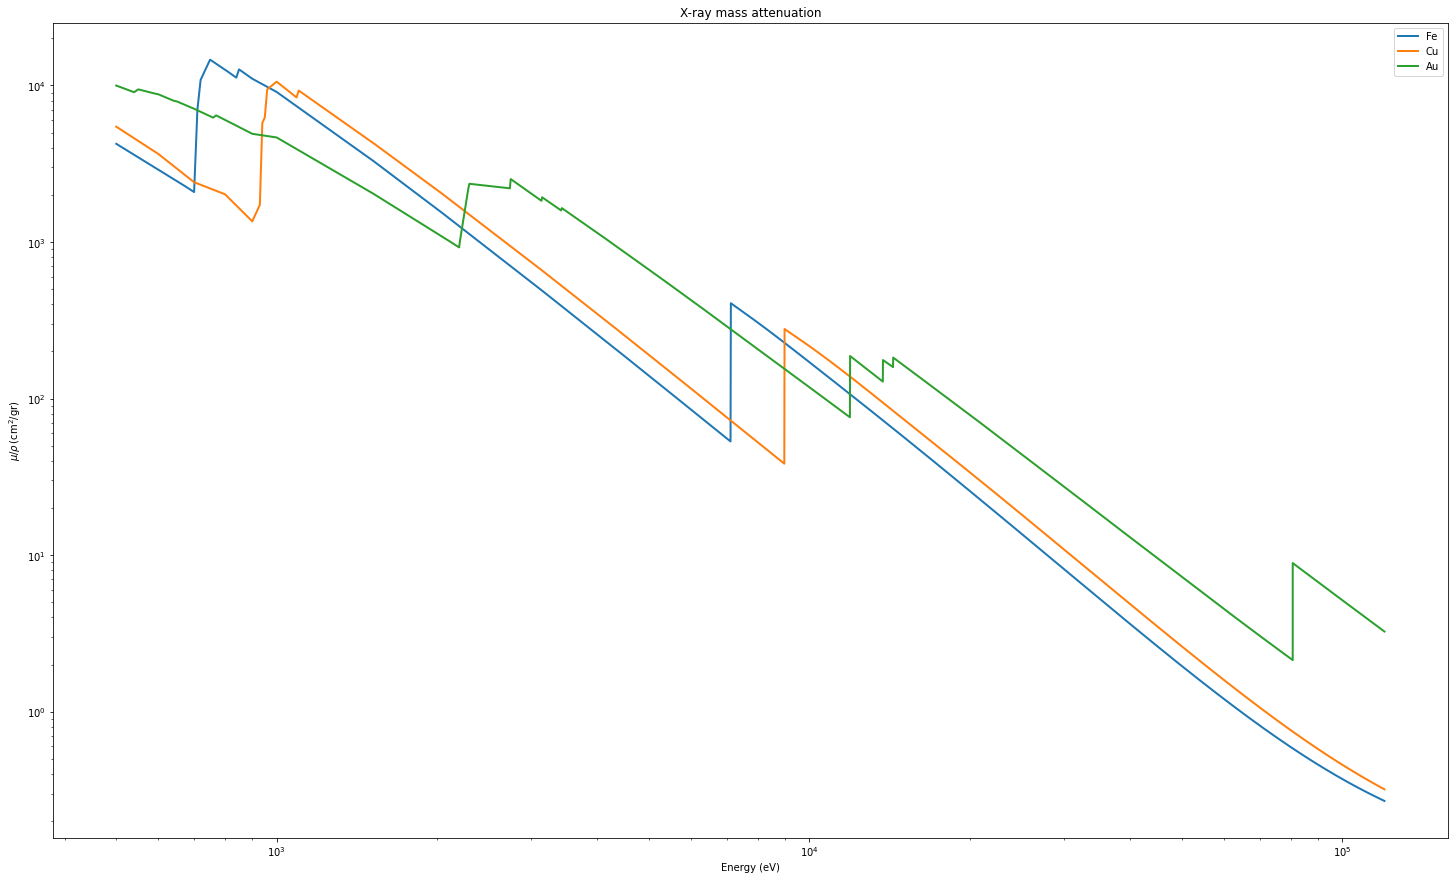

In [13]:
energy = np.arange(500, 120000, 10) # in eV
fig = plt.figure(figsize=(25, 15))
for elem in ('Fe', 'Cu', 'Au'):
    mu = mu_elam(elem, energy)
    plt.plot(energy, mu, label = elem, linewidth=2)

plt.title("X-ray mass attenuation")
plt.xlabel('Energy (eV)')
plt.ylabel(r'$\mu/\rho \rm\, (cm^2/gr)$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.savefig('energy_dist.png', dpi = 300)
plt.show()

In [8]:
mu_elam('Ag', 200)

5741.970837745146

In [13]:
material_mu('H2O', 1000)

4077.1043506612236

In [2]:
from glob import glob
import numpy as np
from color_image import ColorImage
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_img(stl_file, voxel_resolution = 300, rotation = 180, axis = 2):
    ci = ColorImage(stl_file, voxel_resolution=voxel_resolution)
    ci.rotate([0.5, 0, 0], rotation)
    ci.generate_voxels()
    return np.sum(ci.voxels, axis=axis)

In [4]:
def plot_data(data, cmap = 'viridis'):
    plt.figure(figsize=(10, 10))
    im = plt.imshow(data, cmap=cmap)
    plt.axis('off')
    plt.show()

In [5]:
files = glob("../opengl/samples/*.stl")
files

['../opengl/samples\\door_handle.stl',
 '../opengl/samples\\handgun.stl',
 '../opengl/samples\\knife.stl',
 '../opengl/samples\\mouse.stl',
 '../opengl/samples\\shuriken.stl']

In [6]:
handgun = get_img(files[1])

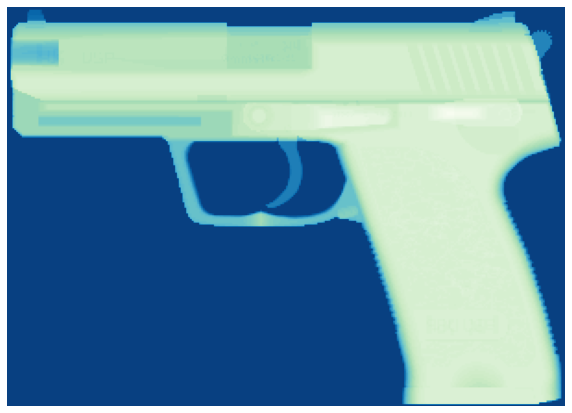

In [7]:
plot_data(handgun, cmap = 'GnBu_r')

In [8]:
calsteps = get_img("stl_files/5mm_Calibration_Steps.stl")

an error has occured at x0z299.0
an error has occured at x1z299.0
an error has occured at x2z299.0
an error has occured at x3z299.0
an error has occured at x4z299.0
an error has occured at x5z299.0
an error has occured at x6z299.0
an error has occured at x7z299.0
an error has occured at x8z299.0
an error has occured at x9z299.0
an error has occured at x10z299.0
an error has occured at x11z299.0
an error has occured at x12z299.0
an error has occured at x13z299.0
an error has occured at x14z299.0
an error has occured at x15z299.0
an error has occured at x16z299.0
an error has occured at x17z299.0
an error has occured at x18z299.0
an error has occured at x19z299.0
an error has occured at x20z299.0
an error has occured at x21z299.0
an error has occured at x22z299.0
an error has occured at x23z299.0
an error has occured at x24z299.0
an error has occured at x25z299.0
an error has occured at x26z299.0
an error has occured at x27z299.0
an error has occured at x28z299.0
an error has occured at 

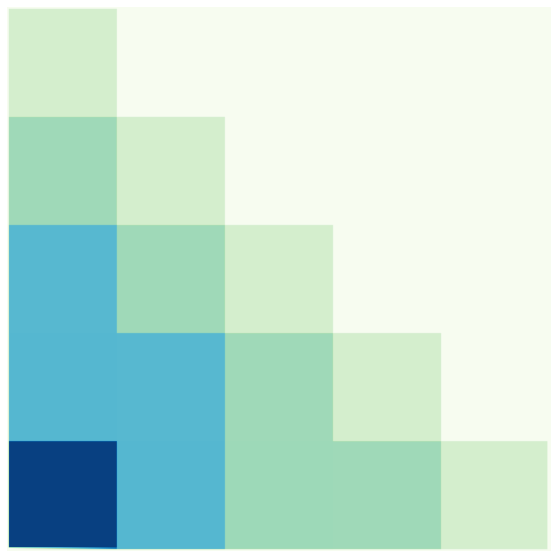

In [9]:
plot_data(calsteps, cmap = "GnBu")

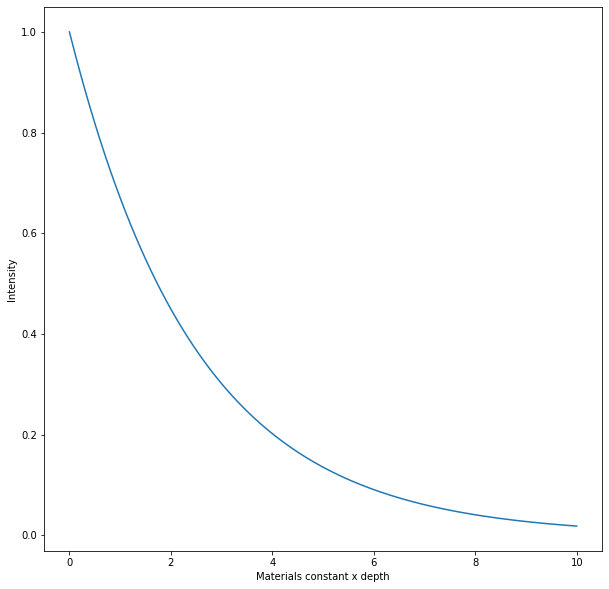

In [58]:
# x = np.linspace(0, 10, 200)
# y = 1.0 * np.exp(-1 * 0.4 * x)
# plt.figure(figsize=(10, 10))
# plt.xlabel("Materials constant x depth")
# plt.ylabel("Intensity")
# plt.plot(x, y)
# plt.show()

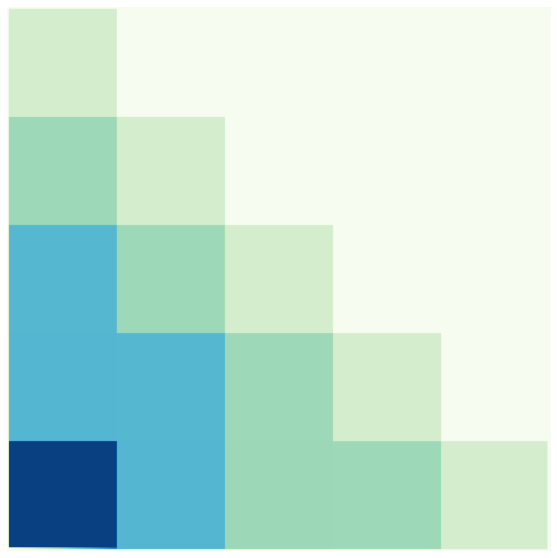

In [54]:
plot_data(np.exp(-1. * 0.0001 * calsteps), cmap = "GnBu_r")

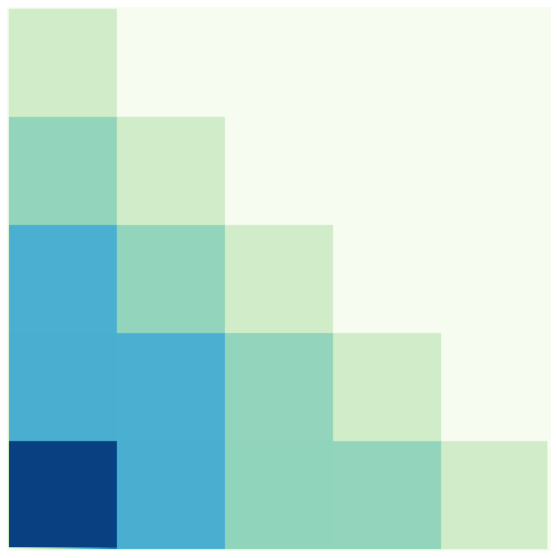

In [55]:
plot_data(np.exp(-1. * 0.001 * calsteps), cmap = "GnBu_r")

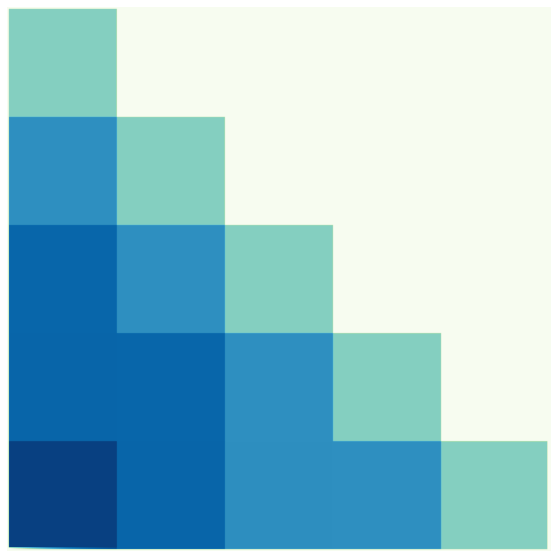

In [56]:
plot_data(np.exp(-1. * 0.01 * calsteps), cmap = "GnBu_r")

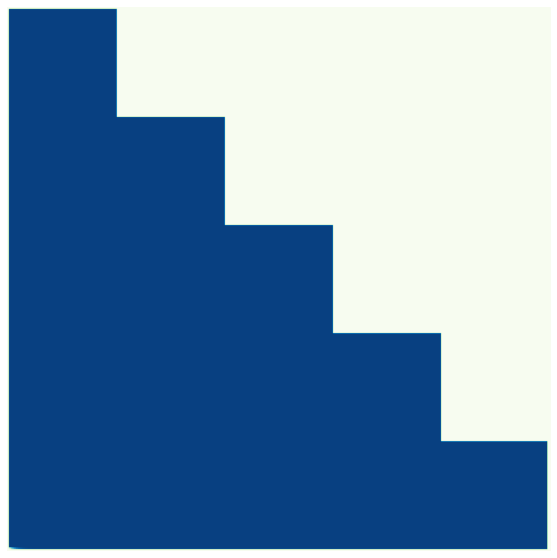

In [57]:
plot_data(np.exp(-1. * 0.1 * calsteps), cmap = "GnBu_r")

In [16]:
z1 = np.exp(-1. * 0.01 * calsteps)
z2 = np.exp(-1. * 0.0001 * calsteps)

In [347]:
import cv2

In [350]:
cv2.imshow("m", z1)

In [341]:
imz = np.concatenate((z1[:, :, np.newaxis], z2[:, :, np.newaxis]), axis=2)
imz.shape

(302, 302, 2)

TypeError: Invalid shape (302, 302, 2) for image data

<Figure size 432x288 with 0 Axes>

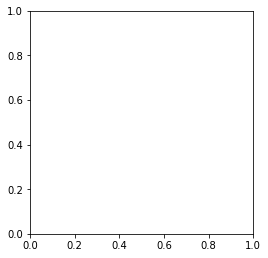

In [345]:
imz /= 255.0
plt.figure()
plt.matshow(imz)
plt.show()

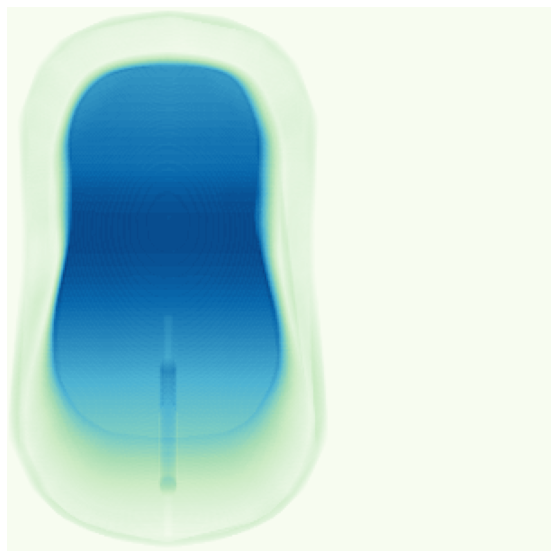

In [219]:
mouse11 = 1.0 * np.exp(1.0 * 0.01 * mouse1)
plot_data(mouse11, cmap = "GnBu")

In [186]:
ch1 = 1.0 * np.exp(1.0 * 0.01 * xray_volume)
ch2 = 50.0 * np.exp(1.0 * 0.01 * xray_volume)

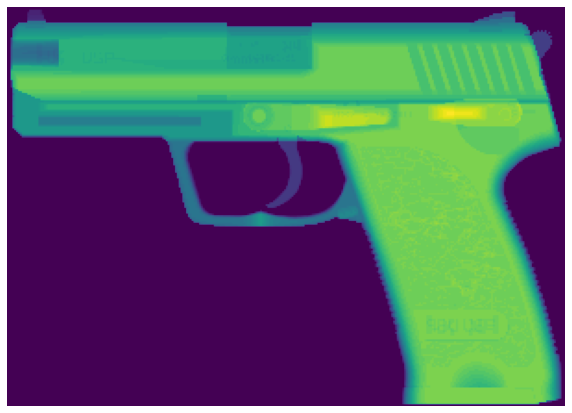

In [187]:
plot_data(ch1, cmap='viridis')

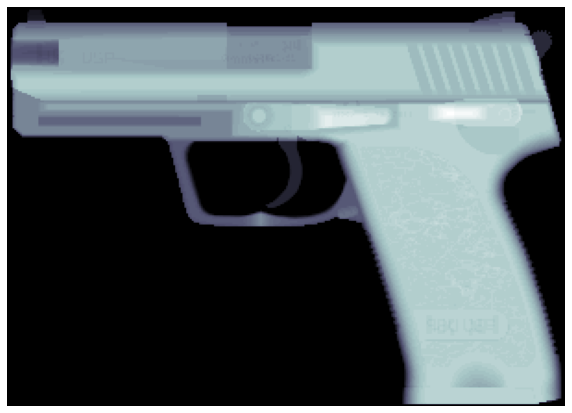

In [190]:
plot_data(ch2, cmap='bone')

In [191]:
np.max(ch1), np.max(ch2)

(1.632316219955379, 81.61581099776895)

In [192]:
ch1 = (ch1 / np.max(ch1)) / 255.0
ch2 = (ch2 / np.max(ch2)) / 255.0

In [193]:
img_2ch = np.concatenate((ch1[:, :, np.newaxis], ch2[:, :, np.newaxis]), axis=2)
img = np.mean(img_2ch, axis=2)
img.shape

(216, 302)

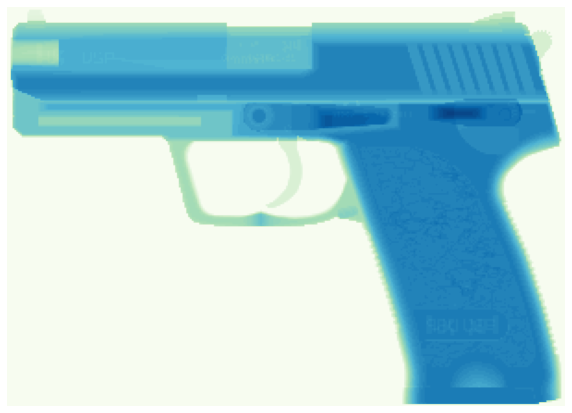

In [194]:
plot_data(img, cmap = "GnBu")

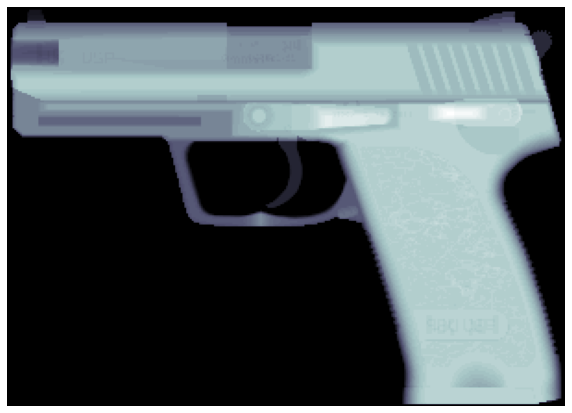

In [195]:
plot_data(ch1, cmap = "bone")

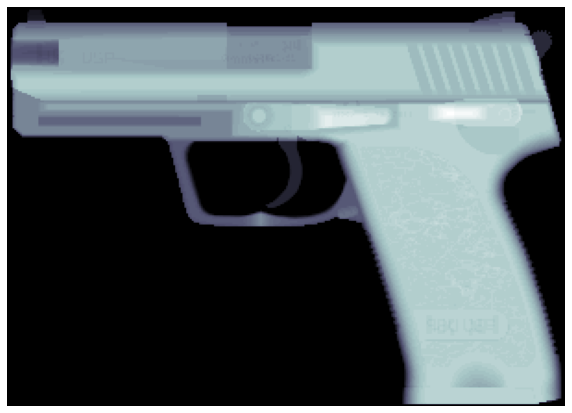

In [196]:
plot_data(ch2, cmap = "bone")

In [125]:
from PIL import Image

In [133]:
im = np.array(Image.open("images/N0000001.jpg"))
im.shape

(1387, 1291, 3)

In [134]:
im[:, :, 0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [135]:
np.min(im[:, :, 0])

0

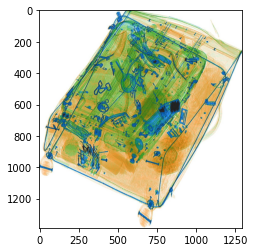

In [136]:
plt.imshow(im)